In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_top_10_stock_data = pd.read_csv('top_10_stock_data.csv')

In [4]:
df_top_10_stock_data['Date'] = pd.to_datetime(df_top_10_stock_data['Date'])


In [5]:
num_unique_tickers = df_top_10_stock_data['Ticker'].nunique()
print(f"Number of unique stock tickers: {num_unique_tickers}")


Number of unique stock tickers: 11


In [6]:
min_date = df_top_10_stock_data['Date'].min().strftime('%Y-%m-%d')
max_date = df_top_10_stock_data['Date'].max().strftime('%Y-%m-%d')
print(f"Date range of the data: {min_date} to {max_date}")


Date range of the data: 2015-01-02 to 2024-08-29


In [7]:
avg_volume = df_top_10_stock_data['Volume'].mean()
print(f"Average daily trading volume: {avg_volume:,.2f}")


Average daily trading volume: 77,700,939.60


In [9]:
!pip install tabulate

In [10]:
print("\nDescriptive statistics for numerical columns:")
print(df_top_10_stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe().to_markdown(numalign="left", stralign="left"))


Descriptive statistics for numerical columns:
|       | Open    | High    | Low     | Close   | Adj Close   | Volume      |
|:------|:--------|:--------|:--------|:--------|:------------|:------------|
| count | 25486   | 25486   | 25486   | 25486   | 25486       | 25486       |
| mean  | 122.881 | 124.156 | 121.584 | 122.911 | 120.839     | 7.77009e+07 |
| std   | 115.448 | 116.648 | 114.176 | 115.448 | 115.47      | 1.57175e+08 |
| min   | 0.48125 | 0.4875  | 0.4735  | 0.4785  | 0.459453    | 0           |
| 25%   | 39.9925 | 40.2225 | 39.6644 | 39.9503 | 38.0053     | 7.83955e+06 |
| 50%   | 91.2722 | 92.3348 | 90.3283 | 91.2342 | 90.0314     | 2.5044e+07  |
| 75%   | 165.7   | 167.208 | 164.028 | 165.617 | 164.885     | 6.0828e+07  |
| max   | 956.2   | 972.53  | 949.95  | 954.48  | 954.48      | 3.69293e+09 |


In [12]:
df_top_10_stock_data['Daily_Range'] = df_top_10_stock_data['High'] - df_top_10_stock_data['Low']
avg_daily_range_per_ticker = df_top_10_stock_data.groupby('Ticker')['Daily_Range'].mean().sort_values(ascending=False).to_frame().reset_index()
print("\nTop 5 Tickers with highest average daily price range (volatility):")
print(avg_daily_range_per_ticker.head().to_markdown(index=False, numalign="left", stralign="left"))


Top 5 Tickers with highest average daily price range (volatility):
| Ticker   | Daily_Range   |
|:---------|:--------------|
| META     | 5.31371       |
| LLY      | 4.94332       |
| MSFT     | 3.53312       |
| BRK-B    | 3.27821       |
| AMZN     | 2.33995       |


In [13]:
import matplotlib.pyplot as plt


In [14]:
tickers_to_plot = ['AAPL', 'MSFT', 'GOOG']
df_plot = df_top_10_stock_data[df_top_10_stock_data['Ticker'].isin(tickers_to_plot)].copy()


The line plot showing the closing price trends for AAPL, MSFT, and GOOG has been created and saved as 'closing_price_trend.png'.


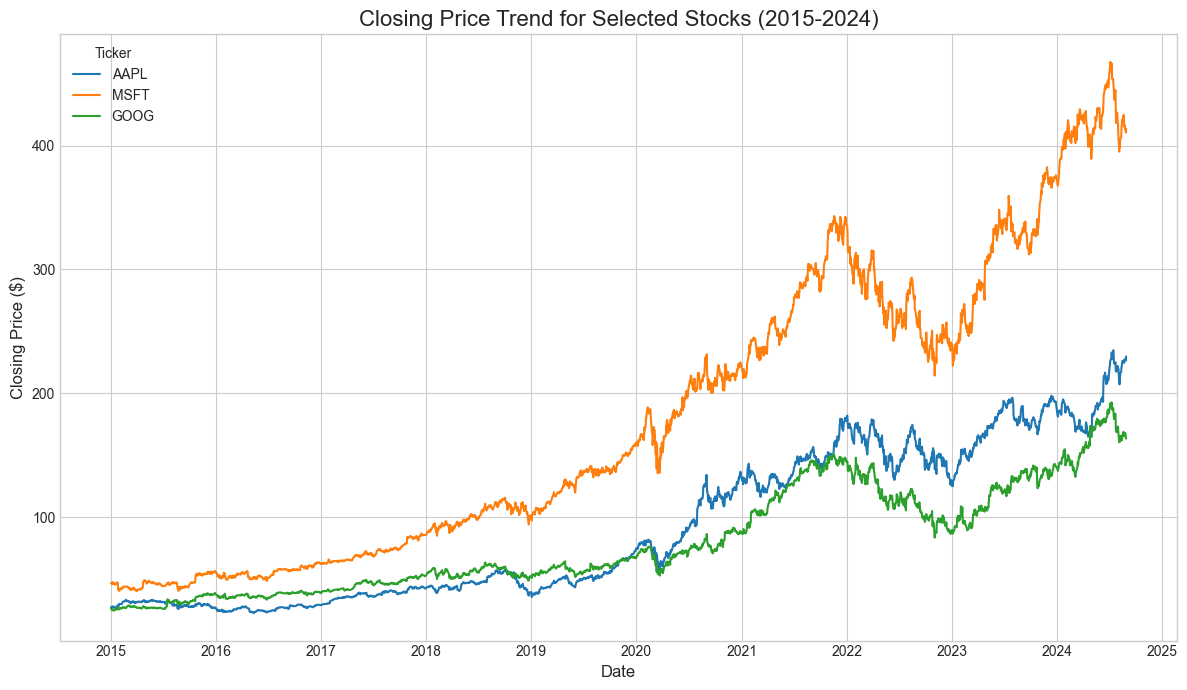

In [17]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

for ticker in tickers_to_plot:
    df_ticker = df_plot[df_plot['Ticker'] == ticker]
    ax.plot(df_ticker['Date'], df_ticker['Close'], label=ticker)
ax.set_title('Closing Price Trend for Selected Stocks (2015-2024)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Closing Price ($)', fontsize=12)
ax.legend(title='Ticker', fontsize=10)
ax.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('closing_price_trend.png')

print("The line plot showing the closing price trends for AAPL, MSFT, and GOOG has been created and saved as 'closing_price_trend.png'.")

Bar chart for average daily trading volume has been created as 'average_volume_bar_chart.png'.


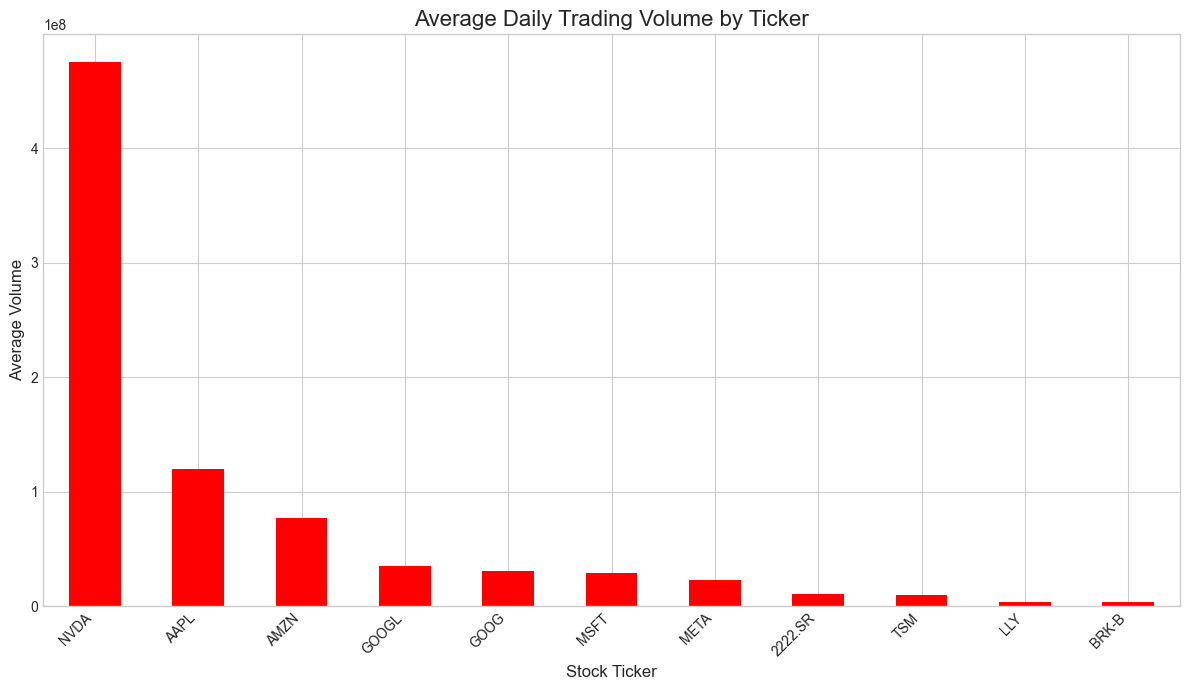

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_top_10_stock_data = pd.read_csv('top_10_stock_data.csv')

# --- Bar Chart: Average Daily Trading Volume by Ticker ---
# Calculate the average volume for each ticker
average_volume_per_ticker = df_top_10_stock_data.groupby('Ticker')['Volume'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 7))
average_volume_per_ticker.plot(kind='bar', color='red')
plt.title('Average Daily Trading Volume by Ticker', fontsize=16)
plt.xlabel('Stock Ticker', fontsize=12)
plt.ylabel('Average Volume', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('average_volume_bar_chart.png')
print("Bar chart for average daily trading volume has been created as 'average_volume_bar_chart.png'.")

# --- Pie Chart: Distribution of Total Volume for Top 5 Stocks ---
# Calculate the total volume for each ticker and get the top 5
total_volume_per_ticker = df_top_10_stock_data.groupby('Ticker')['Volume'].sum().sort_values(ascending=False)
top_5_tickers = total_volume_per_ticker.head(5)


Pie chart for total trading volume of the top 5 tickers has been created as 'total_volume_pie_chart.png'.


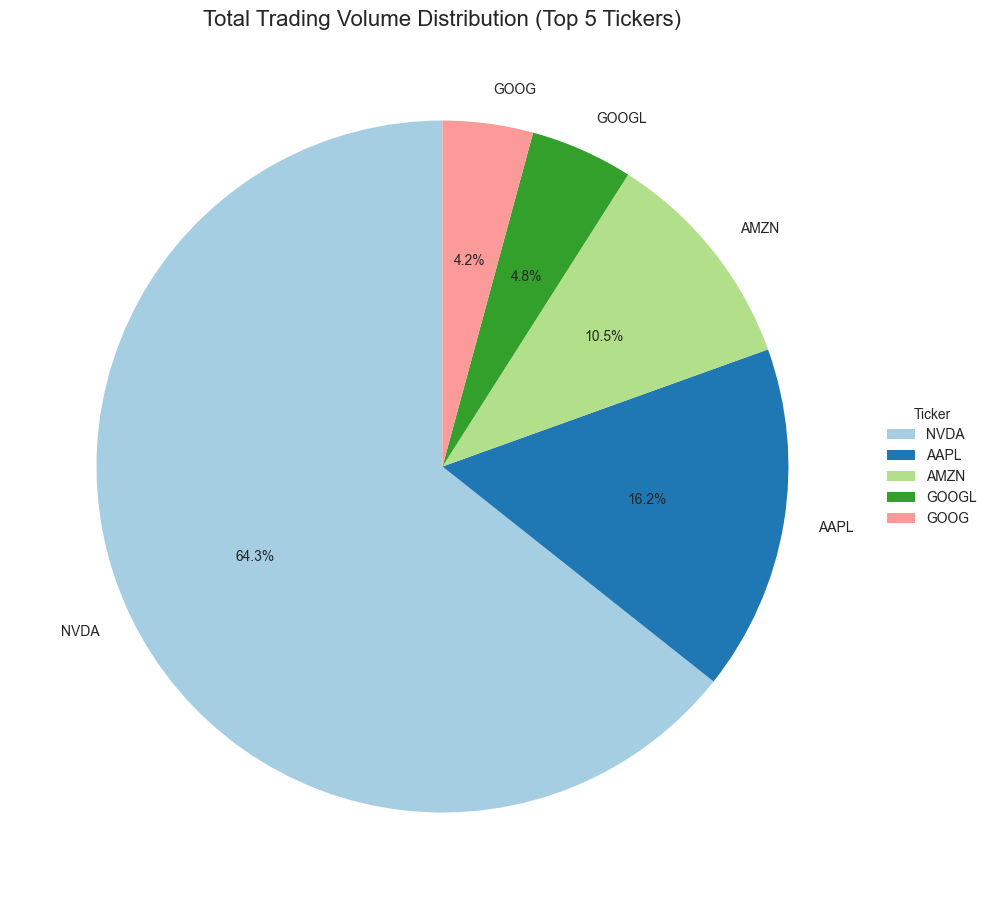

In [20]:
plt.figure(figsize=(10, 10))
plt.pie(top_5_tickers, labels=top_5_tickers.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Trading Volume Distribution (Top 5 Tickers)', fontsize=16)
plt.ylabel('') # Hiding the default y-label
plt.legend(title='Ticker', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('total_volume_pie_chart.png')
print("Pie chart for total trading volume of the top 5 tickers has been created as 'total_volume_pie_chart.png'.")

Scatter plot of Closing Price vs. Volume has been created as 'close_vs_volume_scatter.png'.
Box plot of Closing Prices has been created as 'close_price_boxplot.png'.


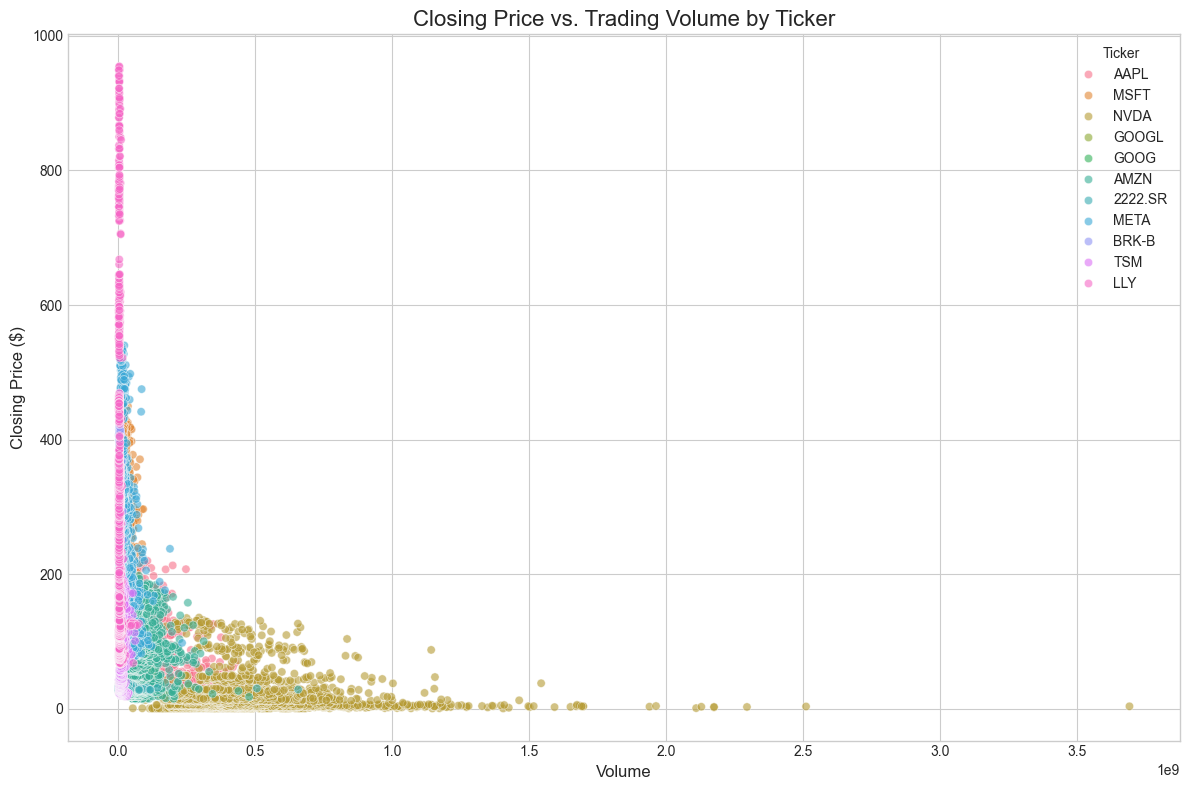

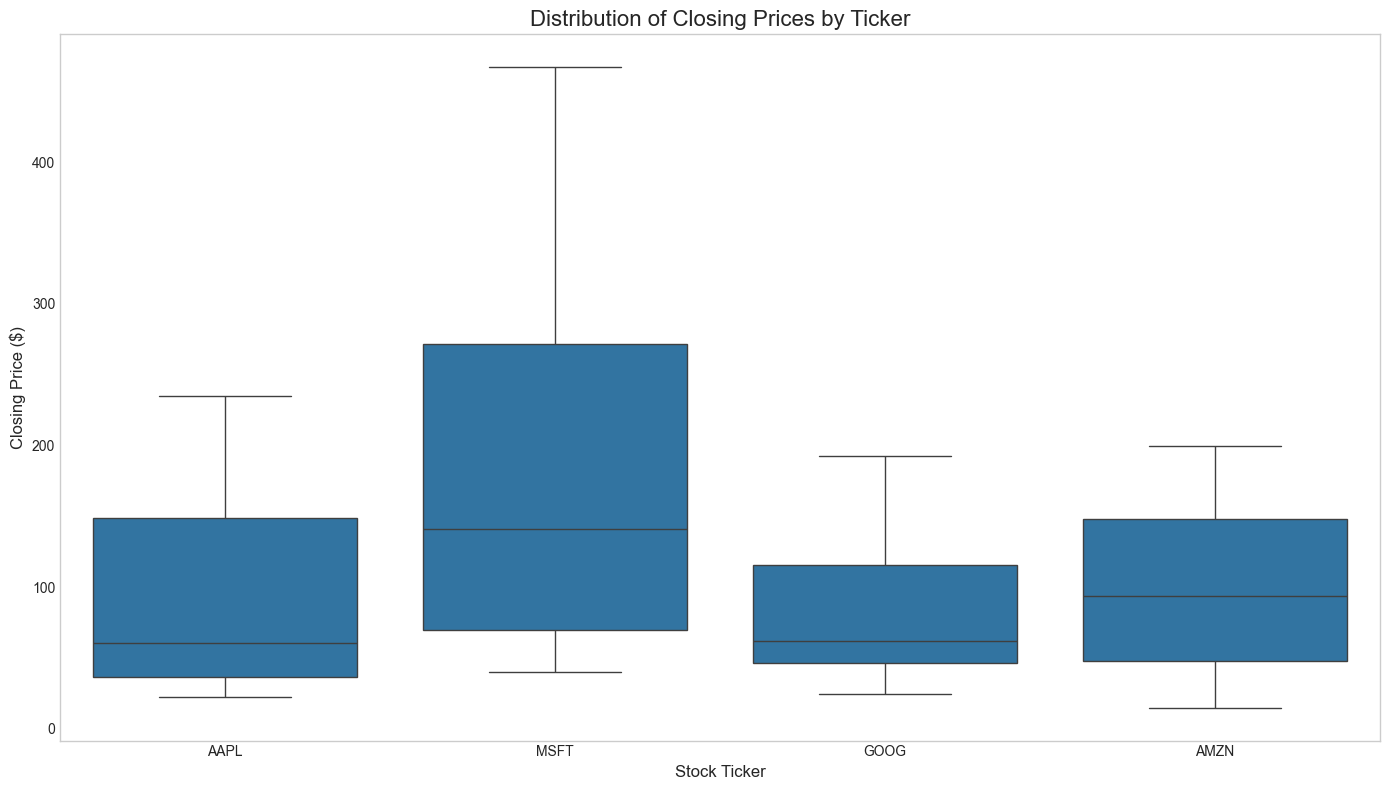

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('top_10_stock_data.csv')

# --- Scatter Plot: Closing Price vs. Volume ---
# This plot will help visualize if there is a relationship between a stock's price and its trading volume.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Volume', y='Close', hue='Ticker', alpha=0.6)
plt.title('Closing Price vs. Trading Volume by Ticker', fontsize=16)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.savefig('close_vs_volume_scatter.png')
print("Scatter plot of Closing Price vs. Volume has been created as 'close_vs_volume_scatter.png'.")

# --- Box Plot: Distribution of Closing Prices by Ticker ---
# This plot will show the distribution, median, and outliers for the closing prices of each stock.
# Select the tickers to plot for clarity
tickers_to_plot = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']
df_boxplot = df[df['Ticker'].isin(tickers_to_plot)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_boxplot, x='Ticker', y='Close')
plt.title('Distribution of Closing Prices by Ticker', fontsize=16)
plt.xlabel('Stock Ticker', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('close_price_boxplot.png')
print("Box plot of Closing Prices has been created as 'close_price_boxplot.png'.")